In [2]:
from datetime import timedelta

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

import json
import os


In [3]:
r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'float64',
})

bikeshare_stations.to_csv('./data/bikeshare_stations.csv', index=False)
bikeshare_stations.sample(10)

,station_id,name,lat,lon
101,7104.0,King St E / River St,43.656785,-79.356274
245,7266.0,Victoria Park Subway Station - SMART,43.694015,-79.288984
532,7596.0,Langford Ave / Danforth Ave - SMART,43.680022,-79.340568
572,7637.0,Judson St / Royal York,43.616272,-79.499036
262,7283.0,Front St W / Bay St (South Side),43.645950,-79.378761
250,7271.0,Yonge St / Alexander St - SMART,43.662862,-79.383572
289,7320.0,Front St W / University Ave (1),43.645164,-79.383176
380,7424.0,Merton St / Mount Pleasant Rd,43.697819,-79.387860
347,7381.0,Yonge St / Orchard View Blvd,43.708358,-79.398862
69,7069.0,Queen St W / Spadina Ave,43.649147,-79.395504


In [4]:
# Identify the date structure used by each of the files as a dict:
#      * Key: data file name
#      * Value: [datetime format, hour difference bewteen timezone used and Eastern timezone, in this case is 0]
date_formats = {
    'bike-share-ridership-2021-08.csv': ['%m/%d/%Y %H:%M', 0]    
}

In [5]:
df = pd.DataFrame() # Initiate an empty DataFrame
for fn, fmt in date_formats.items():
    tmp = pd.read_csv(os.path.join('./data', fn))
    
    # Read the datetime in the specified format
    tmp['Start Time'] = pd.to_datetime(tmp['Start Time'], format=fmt[0], errors='coerce')
    # Convert the input time to the Easter timezone
    tmp['Start Time'] = tmp['Start Time'] + timedelta(hours=fmt[1])

df = pd.concat([df, tmp], sort=False).reset_index(drop=True)
df.sample(10)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
127706,12968909,428,7199,2021-08-08 18:42:00,College St / Markham St,7255.0,08/08/2021 18:49,Stewart St / Bathurst St - SMART,259,Annual Member
144043,12988008,1037,7019,2021-08-09 21:06:00,Temperance St. Station,7000.0,08/09/2021 21:23,Fort York Blvd / Capreol Ct,555,Annual Member
449383,13339511,277,7469,2021-08-28 19:15:00,Wellington St W / York St,7462.0,08/28/2021 19:20,Richmond St E / Yonge St,2375,Annual Member
447279,13337193,1099,7048,2021-08-28 17:51:00,Front St W / Yonge St (Hockey Hall of Fame),7076.0,08/28/2021 18:09,York St / Queens Quay W,5603,Casual Member
339141,13213691,214,7417,2021-08-22 00:31:00,King St W / Jordan St,7382.0,08/22/2021 00:35,Simcoe St / Adelaide St W,5751,Annual Member
244139,13104136,1571,7650,2021-08-16 08:43:00,St Clair W Subway - Heath Entrance,7147.0,08/16/2021 09:09,King St W / Fraser Ave,1855,Casual Member
248354,13109159,1880,7151,2021-08-16 15:18:00,Essex St / Christie St - SMART,7288.0,08/16/2021 15:50,Humber Bay Shores Park West,5247,Casual Member
394256,13276337,1025,7018,2021-08-25 16:40:00,Bremner Blvd / Rees St,7275.0,08/25/2021 16:57,Queen St W / James St,2742,Casual Member
172881,13023288,775,7531,2021-08-12 06:03:00,541 Huron St - SMART,7284.0,08/12/2021 06:16,University Ave / King St W - SMART,1039,Casual Member
222699,13079642,1216,7399,2021-08-14 23:17:00,Lower Jarvis / Queens Quay E,7411.0,08/14/2021 23:38,Little Norway Park,6912,Casual Member


In [6]:
# Extracts the unique station ID and name combination from the from_station and to_station columns

#tmp = pd.read_csv(os.path.join('./data', fn))
#display(tmp)
#stations_start = df[['Start Station Id', 'Start Station Name']]
#stations_end = df[['End Station Id', 'End Station Name']]
#stations_start.columns = stations_end.columns = ['station_id', 'name']

# Extracts the unique station ID and name combination from the from_station and to_station columns
#stations = pd.concat([stations_start, stations_end]).dropna(how='all').drop_duplicates().reset_index(drop=True)
df.shape

(496943, 10)

In [7]:
#resolve the issues with the station IDs and names
stations_start = df[['Start Station Id', 'Start Station Name']]
stations_end = df[['End Station Id', 'End Station Name']]
stations_start.columns = stations_end.columns = ['station_id', 'name']

# Extracts the unique station ID and name combination from the from_station and to_station columns
stations = pd.concat([stations_start, stations_end]).dropna(how='all').drop_duplicates().reset_index(drop=True)
stations.sample(10)
#stations_start.sample(10)

,station_id,name
222,7355.0,Beltline Trail / Chaplin Cres.
78,7599.0,Richmond St W / York St
389,7377.0,Balliol St / Yonge St SMART
457,7455.0,E.T. Seton Park (Eglinton Ave E / Leslie St)
325,7351.0,Pretoria Av / Broadview Av
582,7597.0,Yonge St / Golfdale Rd
43,7026.0,Bay St / St. Joseph St
530,7659.0,Amroth Ave / Danforth Ave
73,7014.0,Sherbourne St / Carlton St (Allan Gardens)
126,7011.0,Wellington St W / Portland St


In [8]:
# Separate the stations without station IDs
no_ids = stations[stations['station_id'].isnull()]
for idx, miss in no_ids.iterrows():
    max_score = 0
    
    # Compare the similarity of the station without ID to each station in the API data
    for i, exist in bikeshare_stations[['station_id', 'name']].iterrows():
        score = fuzz.ratio(miss['name'], exist['name'])
        
        if score > 80 and score > max_score:
            max_score = score
            no_ids.at[idx, 'station_id'] = exist['station_id']
    
    # Warn if the station was not able to be matched
    if max_score <= 80:
        print('WARN: {0} station could not be matched to an existing station'.format(miss['name']))

# Remove all stations that were not matched
no_ids = no_ids.dropna()
stations.sample(10)

,station_id,name
459,7497.0,128 Sterling Ave - SMART
59,7581.0,High Park Ave / Dundas St W
5,7334.0,Simcoe St / Wellington St North
424,7193.0,Queen St W / Gladstone Ave
56,7217.0,Soho St / Queen St W
391,7254.0,Borden St / Bloor St W - SMART
431,7505.0,Ontario St / Adelaide St E -SMART
407,7041.0,Edward St / Yonge St
577,7303.0,Queen St E / Woodward Ave
144,7463.0,Adelaide St W / Brant St


In [9]:
stations = pd.concat([stations[~stations['station_id'].isnull()], no_ids])\
             .merge(bikeshare_stations[['station_id', 'lat', 'lon']], how='inner', on='station_id')\
             .drop_duplicates()
stations.sample(10)
#df.shape

,station_id,name,lat,lon
262,7152.0,Ossington Ave / Bloor St W,43.661705,-79.425734
223,7524.0,Lisgar Park,43.642385,-79.424028
372,7622.0,Marie Curtis Park,43.588077,-79.543207
478,7596.0,Langford Ave / Danforth Ave - SMART,43.680022,-79.340568
373,7627.0,Shaw St / Essex St - SMART,43.667076,-79.425116
456,7639.0,Riverview Gardens - SMART,43.639971,-79.399404
215,7353.0,Fulton Ave / Pape Ave,43.683950,-79.347046
28,7433.0,Dundas St E / Boulton Ave - SMART,43.663148,-79.347938
53,7089.0,Church St / Wood St,43.662712,-79.379903
341,7144.0,Palmerston Ave / Vermont Ave,43.671389,-79.416389


In [10]:
df = df.merge(stations, how='inner', left_on='Start Station Name', right_on='name') \
       .merge(stations, how='inner', left_on='End Station Name', right_on='name', suffixes=['_Start', '_End']) \
       .drop_duplicates()

#df = df[[x for x in df.columns if not x.endswith('Station Id') and not x.endswith('Station Name') and x != 'End Time']]

In [11]:
df.columns.duplicated()
#

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [12]:
df.sample(10)
#df.describe()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,station_id_Start,name_Start,lat_Start,lon_Start,station_id_End,name_End,lat_End,lon_End
213618,12893096,1066,7043,2021-08-04 19:31:00,Queens Quay W / Lower Simcoe St,7458.0,08/04/2021 19:49,Church St / Lombard St,259,Casual Member,7043.0,Queens Quay W / Lower Simcoe St,43.639510,-79.383717,7458.0,Church St / Lombard St,43.651678,-79.375233
94223,13152274,1581,7242,2021-08-18 23:55:00,Lake Shore Blvd W / Ontario Dr,7070.0,08/19/2021 00:22,25 York St GÇô Union Station South,4556,Annual Member,7242.0,Lake Shore Blvd W / Ontario Dr,43.630254,-79.420317,7070.0,25 York St GÇô Union Station South,43.643667,-79.380414
86898,12900357,518,7000,2021-08-05 08:39:00,Fort York Blvd / Capreol Ct,7020.0,08/05/2021 08:48,Phoebe St / Spadina Ave,5650,Annual Member,7000.0,Fort York Blvd / Capreol Ct,43.639832,-79.395954,7020.0,Phoebe St / Spadina Ave,43.650033,-79.396555
201894,13117377,429,7026,2021-08-16 23:03:00,Bay St / St. Joseph St,7418.0,08/16/2021 23:10,College Park - Yonge St Entrance,3903,Annual Member,7026.0,Bay St / St. Joseph St,43.665527,-79.387499,7418.0,College Park - Yonge St Entrance,43.659880,-79.382790
33285,13203502,1520,7076,2021-08-21 16:11:00,York St / Queens Quay W,7076.0,08/21/2021 16:37,York St / Queens Quay W,6819,Annual Member,7076.0,York St / Queens Quay W,43.640132,-79.380464,7076.0,York St / Queens Quay W,43.640132,-79.380464
175430,13298285,250,7204,2021-08-26 20:00:00,College St / Crawford St,7199.0,08/26/2021 20:04,College St / Markham St,2317,Casual Member,7204.0,College St / Crawford St,43.655000,-79.418889,7199.0,College St / Markham St,43.656389,-79.409167
216811,12989142,709,7001,2021-08-09 22:42:00,Wellesley Station Green P,7074.0,08/09/2021 22:54,King St E / Church St,6012,Annual Member,7001.0,Wellesley Station Green P,43.664964,-79.383550,7074.0,King St E / Church St,43.650039,-79.373354
110637,13387412,1834,7569,2021-08-31 18:33:00,Toronto Inukshuk Park,7411.0,08/31/2021 19:03,Little Norway Park,5836,Casual Member,7569.0,Toronto Inukshuk Park,43.632399,-79.409782,7411.0,Little Norway Park,43.635023,-79.399505
415529,12932721,1550,7440,2021-08-06 21:09:00,Martin Goodman Trail / Ontario Dr,7192.0,08/06/2021 21:35,Harbord St / Clinton St,4775,Annual Member,7440.0,Martin Goodman Trail / Ontario Dr,43.631210,-79.414140,7192.0,Harbord St / Clinton St,43.660414,-79.415646
55848,13290590,742,7099,2021-08-26 12:43:00,Cherry St / Mill St,7400.0,08/26/2021 12:56,Polson Pier,1019,Casual Member,7099.0,Cherry St / Mill St,43.651248,-79.357848,7400.0,Polson Pier,43.641675,-79.354006


In [13]:
df.describe()

,Trip Id,Trip Duration,Start Station Id,End Station Id,Bike Id,station_id_Start,lat_Start,lon_Start,station_id_End,lat_End,lon_End
count,4.860680e+05,486068.000000,486068.000000,486068.000000,486068.000000,486068.000000,486068.000000,486068.000000,486068.000000,486068.000000,486068.000000
mean,1.310966e+07,1031.015068,7256.670684,7254.604761,3764.268973,7256.670684,43.654921,-79.391661,7254.604761,43.654011,-79.391394
std,1.651078e+05,3441.069702,183.850773,182.924149,1954.883147,183.850773,0.017596,0.034716,182.924149,0.017181,0.034978
min,1.282400e+07,0.000000,7000.000000,7000.000000,15.000000,7000.000000,43.588077,-79.545827,7000.000000,43.588077,-79.545827
25%,1.296529e+07,471.000000,7085.000000,7079.000000,2164.000000,7085.000000,43.643795,-79.406468,7079.000000,43.643307,-79.406111
50%,1.311013e+07,782.000000,7239.000000,7236.000000,4025.000000,7239.000000,43.652822,-79.389150,7236.000000,43.652123,-79.388910
75%,1.325302e+07,1212.000000,7406.000000,7399.000000,5499.000000,7406.000000,43.663376,-79.376785,7399.000000,43.662222,-79.376785
max,1.339270e+07,922023.000000,7671.000000,7671.000000,6936.000000,7671.000000,43.788319,-79.123505,7671.000000,43.788319,-79.123505


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


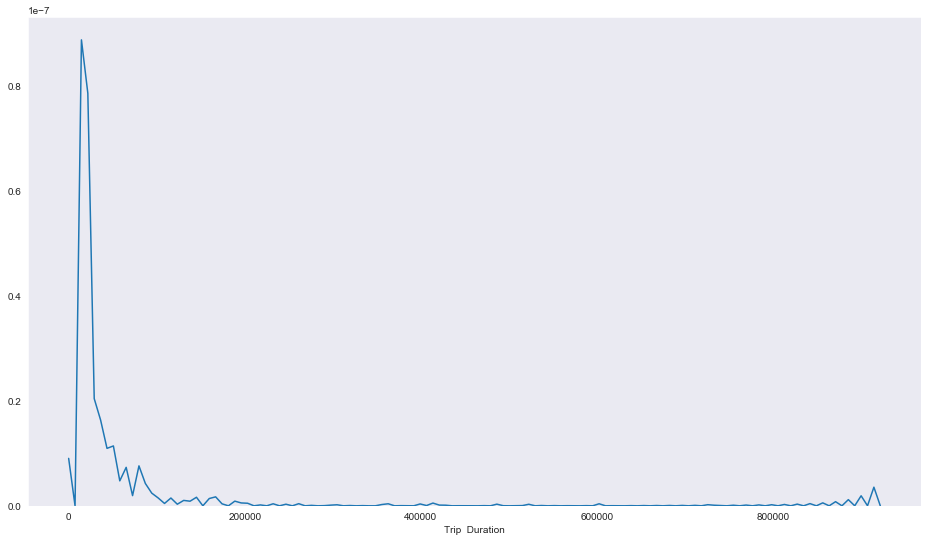

In [14]:
sns.set_style('dark')

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.distplot(df['Trip  Duration'], hist=False, ax=ax)

plt.savefig('./visualization/raw_distributions.png')

In [15]:
df.shape

(486068, 18)

In [16]:
df.to_csv('./data/bikeshare_ridership_Out.csv', index=False)